<a href="https://colab.research.google.com/github/akutayaydin/Medical-Sarcopenia-Model/blob/main/Sarcopenia_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The Scope of this project is to find a way(s) to identify Sarcopenia patients?

In [2]:
# Import Libraries

import numpy as np
import pandas as pd

In [3]:
# Mount and Access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# DATA COLLECTION #

In [5]:
df = pd.read_csv("/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Patients.csv")

In [6]:
df

,0,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,...,Egz,AT,CST,GS,GS.1,Star,BMI,Sarcopenia,Gender,Ad
0,1,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,social,...,3-4/week,50.2,12.50,1.20,32.0,1.81,27.80,0,M,beyzanur
1,2,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,social,...,0,49.0,12.10,1.40,47.0,1.38,35.50,1,M,beyzanur
2,3,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0,...,3-4/week,37.3,8.70,1.20,33.0,1.20,31.20,0,M,beyzanur
3,4,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0,...,1-2/week,29.5,8.30,1.20,25.0,1.11,26.60,0,F,beyzanur
4,5,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0,...,1-2/week,39.5,11.00,1.30,31.0,1.26,31.30,0,F,beyzanur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,30.0,70.0,73.0,143.0,103.0,111.0,0,0.0,0,...,0,28.2,14.67,0.81,19.5,0.79,35.70,1,F,ÖZDEN
5012,5013,29.0,72.0,78.0,160.0,100.0,108.0,0,0.0,0,...,3-4/week,37.9,9.14,1.23,18.7,1.24,30.47,0,F,ÖZDEN
5013,5014,30.0,79.0,95.0,180.0,100.0,114.0,0,0.0,0,...,0,43.2,11.86,1.16,29.5,1.47,29.32,0,M,ÖZDEN
5014,5015,30.0,85.0,96.0,161.0,106.0,107.0,0,0.0,0,...,0,39.0,17.12,0.90,17.9,1.05,37.04,1,M,ÖZDEN


In [7]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 43)
Columns: Index(['0', 'MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       'DM drug', 'Dyslipidemia', 'Dyslipidemia duration', 'Statin', 'KAH ',
       'KAH duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'Dıration of HT', 'N_HT', 'HT drugs', 'Duration of 1HT',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS.1', 'Star',
       'BMI', 'Sarcopenia', 'Gender', 'Ad'],
      dtype='object')


In [8]:
# Remove not relevant columns
df = df.drop('0', axis =1)
df = df.drop('Ad', axis =1)

In [9]:
# Rename turkish column names and spaces
df = df.rename(columns = {'İnsülin':'Insulin', 'Dyslipidemia duration': 'Dyslipidemia_Duration','DM duration': 'DM_Duration','DM drug': 'DM_Drug','KAH duration': 'KAH_Duration','Dıration of HT': 'HT_Duration', 'HT drugs': 'HT_Drugs','Duration of 1HT':'1HT_Duration','GS.1': 'GS_1','Weight ':'Weight','Height ':'Height','Waist ':'Waist', ' Smoking (packet/year)': 'Smoking_Packets_Per_Year',' Alcohol':'Alcohol','DM ': 'DM','KAH ':'KAH','  Alcohol':'Alcohol'})

In [10]:
columns_to_check = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI'
]

# Convert the values in the specified column to numeric data types
for col in columns_to_check:
    non_numeric = pd.to_numeric(df[col], errors='coerce').notna().any()
    print(f"Column '{col}' contains non-numeric values: {non_numeric}")

df['OP'] = df['OP'].replace(' ',np.nan)

Column 'MMSE' contains non-numeric values: True
Column 'Age' contains non-numeric values: True
Column 'Weight' contains non-numeric values: True
Column 'Height' contains non-numeric values: True
Column 'Waist' contains non-numeric values: True
Column 'Hip' contains non-numeric values: True
Column 'Smoking' contains non-numeric values: True
Column 'Smoking_Packets_Per_Year' contains non-numeric values: True
Column 'DM' contains non-numeric values: True
Column 'DM_Duration' contains non-numeric values: True
Column 'Insulin' contains non-numeric values: True
Column 'Dyslipidemia' contains non-numeric values: True
Column 'Dyslipidemia_Duration' contains non-numeric values: True
Column 'KAH' contains non-numeric values: True
Column 'KAH_Duration' contains non-numeric values: True
Column 'Hipotiroidi' contains non-numeric values: True
Column 'ASTIM' contains non-numeric values: True
Column 'KOAH' contains non-numeric values: True
Column 'HT' contains non-numeric values: True
Column 'HT_Durat

In [11]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 41)
Columns: Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'Alcohol', 'DM', 'DM_Duration', 'Insulin',
       'DM_Drug', 'Dyslipidemia', 'Dyslipidemia_Duration', 'Statin', 'KAH',
       'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'HT_Duration', 'N_HT', 'HT_Drugs', '1HT_Duration',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS_1', 'Star',
       'BMI', 'Sarcopenia', 'Gender'],
      dtype='object')


In [12]:
df[(df['MMSE'].isna())& (df['Sarcopenia'] > 0) ] # 901 patient does not have MMSE data and 146 patients labeled as Sarcopenia

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,Alcohol,DM,...,Status,Egz,AT,CST,GS,GS_1,Star,BMI,Sarcopenia,Gender
346,NaN,72.0,95.0,155.0,108.0,125.0,0,0.0,0,0.0,...,retired,0,34.8,16.8,0.9,21.0,0.88,39.50,1,F
417,NaN,70.0,71.0,156.0,101.0,100.0,1,30.0,0,0.0,...,Retired,0,27.0,12.0,1.0,28.0,0.92,29.20,1,M
423,NaN,56.0,67.0,172.0,93.0,95.0,1,15.0,0,1.0,...,Retired,0,29.7,9.0,1.4,26.0,1.31,22.70,1,M
429,NaN,58.0,80.0,153.0,101.0,120.0,0,0.0,0,1.0,...,unemployed,0,26.0,15.6,1.1,19.0,0.76,34.20,1,F
433,NaN,74.0,100.0,184.0,110.0,120.0,0,0.0,0,1.0,...,unemployed,3-4/week,28.4,17.1,1.0,29.0,0.96,29.50,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,NaN,71.0,109.0,147.0,124.0,143.0,0,0.0,0,0.0,...,çalışmıyor,0,35.9,50.0,0.4,12.0,0.71,50.21,1,F
4959,NaN,74.0,87.0,150.0,116.0,135.0,0,0.0,0,0.0,...,çalışmıyor,0,36.6,14.8,0.8,21.0,0.95,38.67,1,F
4960,NaN,80.0,87.0,148.0,116.0,137.0,0,0.0,0,1.0,...,çalışmıyor,0,34.9,18.6,0.5,21.0,0.88,39.72,1,F
4961,NaN,81.0,82.0,158.0,109.0,93.0,1,150.0,0,1.0,...,emekli,1-2/week,27.1,24.5,0.5,27.0,0.80,32.85,1,M


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,4115.0,27.620656,2.859489,9.00,27.00,28.00,30.00,30.00
Age,5015.0,61.996810,9.696511,42.00,54.00,62.00,69.00,95.00
Weight,5007.0,76.580188,13.711160,34.00,67.00,76.00,85.00,137.00
Height,5007.0,160.495906,9.034135,125.00,155.00,160.00,166.00,260.00
Waist,4903.0,98.171936,19.209012,0.00,90.00,98.00,106.00,915.00
Hip,4905.0,111.008155,14.486069,0.00,102.00,109.00,117.00,191.00
Smoking,5016.0,0.320375,0.466667,0.00,0.00,0.00,1.00,1.00
Smoking_Packets_Per_Year,5014.0,8.190666,16.073376,0.00,0.00,0.00,10.00,150.00
DM,5014.0,0.304547,0.460261,0.00,0.00,0.00,1.00,1.00
DM_Duration,4929.0,3.123554,6.536226,0.00,0.00,0.00,2.00,40.00


Patient age group is between 42-95. Average age is 62 years old.

In [14]:
categorical_values = df.select_dtypes(include=[object])
categorical_values.columns

Index(['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender'],
      dtype='object')

In [15]:
# Label Encoding for Categorical Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender']

for col in columns_to_encode:
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [16]:
df

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,Alcohol,DM,...,Statin_encoded,OP_encoded,OTHERS_encoded,Type_HT_encoded,HT_Drugs_encoded,Education_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,social,1.0,...,23,2,20,58,700,4,290,13,3,1
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,social,0.0,...,23,2,31,80,1099,3,164,13,1,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0,0.0,...,23,2,487,80,1099,4,103,13,3,1
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0,0.0,...,23,2,265,38,87,4,7,13,2,0
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0,0.0,...,23,2,236,54,405,4,107,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,30.0,70.0,73.0,143.0,103.0,111.0,0,0.0,0,1.0,...,23,0,78,80,474,8,233,27,1,0
5012,29.0,72.0,78.0,160.0,100.0,108.0,0,0.0,0,0.0,...,6,0,455,80,706,5,233,27,3,0
5013,30.0,79.0,95.0,180.0,100.0,114.0,0,0.0,0,0.0,...,6,2,135,80,351,11,252,27,1,1
5014,30.0,85.0,96.0,161.0,106.0,107.0,0,0.0,0,0.0,...,6,2,265,80,175,11,252,27,1,1


In [17]:
# FEATURE ENGINEERING #


1.   **'MMSE'**, Mini-Mental State Examination, a test used to assess cognitive impairment and dementia
1.   **'Waist'**, waist circumference
1.   **'Hip'**, hip circumference
1.   **'DM'**, individual has diabetes or not
1.   **'DM_Duration'**, length of time the individual has had diabetes
1.   **'Insulin'**, Is individual taking insulin
1.   **'DM_Drug'**, medications or drugs used to manage diabetes
1.   **'Dyslipidemia'**, cholesterol levels
1.   **'Statin'**, statin medications to manage dyslipidemia
1.   **'KAH'**, coronary artery disease
1.   **'Hipotiroidi'**, underactive thyroid gland
1.   **'KOAH'**, Chronic Obstructive Pulmonary Disease (Kronik Obstrüktif Akciğer Hastalığı)
1.   **'OP'**, osteoporosis (Kemik Erimesi)
1.   **'HT'**, high blood pressure
1.   **'N_HT'**, number of medications or drugs taken for hypertension???
1.   **'1HT_Duration'**, duration of time since the first diagnosis of hypertension.???
1.   **'Status'**, Maritial Status
1.   **'Egz'**, exercise or physical activity indicator
1.   **'AT'**, ???
1.   **'CST'**, CHAIR STAND TEST??
1.   **'GS'**, gates speed(walk test)??
1.   **'GS_1'**, grip test??
1.   **'Star'**, sonographic thigh adjustment ratio
1.   **'BMI'**, Body Mass Index



In [18]:






# Correlation Matrix
# Look for correlation between numerical and encoded parameters

num_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol_encoded', 'DM_Drug_encoded', 'Statin_encoded', 'OP_encoded', 'OTHERS_encoded', 'Type_HT_encoded', 'HT_Drugs_encoded',
    'Education_encoded', 'Job_encoded', 'Status_encoded', 'Egz_encoded', 'Gender_encoded','Sarcopenia']

num_df = pd.DataFrame()

for col in num_columns:
  num_df[col] = df[col]

corr = num_df.corr()
corr

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,OP_encoded,OTHERS_encoded,Type_HT_encoded,HT_Drugs_encoded,Education_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded,Sarcopenia
MMSE,1.000000,-0.235060,0.055053,0.180953,-0.008199,-0.067424,0.162321,0.115700,-0.065473,-0.066638,...,0.008887,-0.026267,0.031818,0.041189,-0.219585,-0.003438,0.122399,0.134078,0.135477,-0.075432
Age,-0.235060,1.000000,-0.105357,-0.199233,0.099343,0.031687,-0.044993,0.050823,0.153930,0.208972,...,0.051669,-0.159132,-0.061215,-0.148853,0.074780,0.109652,0.023418,0.005547,0.101237,0.339400
Weight,0.055053,-0.105357,1.000000,0.349069,0.467120,0.505885,0.071224,0.073287,0.129233,0.063949,...,0.137848,-0.034910,-0.134050,-0.088979,-0.030809,0.048433,0.011271,-0.090589,0.243639,0.126956
Height,0.180953,-0.199233,0.349069,1.000000,0.061482,-0.093498,0.263998,0.254377,-0.089091,-0.111145,...,0.127672,-0.058694,0.027681,0.073239,-0.051745,0.112161,-0.047777,0.129061,0.650478,-0.086261
Waist,-0.008199,0.099343,0.467120,0.061482,1.000000,0.237085,0.008894,0.034156,0.123197,0.090566,...,0.108918,-0.034265,-0.133405,-0.092934,0.009047,0.021875,0.017554,-0.056148,0.110019,0.133240
Hip,-0.067424,0.031687,0.505885,-0.093498,0.237085,1.000000,-0.075502,-0.076125,0.121180,0.107388,...,-0.023106,-0.000551,-0.027987,-0.086133,-0.003742,-0.022005,0.038913,-0.127004,-0.155039,0.128859
Smoking,0.162321,-0.044993,0.071224,0.263998,0.008894,-0.075502,1.000000,0.734990,0.013551,-0.010933,...,0.140486,-0.085615,-0.062756,-0.006008,-0.119054,0.058300,-0.005931,0.084615,0.346605,-0.020667
Smoking_Packets_Per_Year,0.115700,0.050823,0.073287,0.254377,0.034156,-0.076125,0.734990,1.000000,0.038237,0.009940,...,0.137133,-0.073088,-0.072655,-0.020431,-0.112344,0.062723,-0.017502,0.062117,0.381987,0.017766
DM,-0.065473,0.153930,0.129233,-0.089091,0.123197,0.121180,0.013551,0.038237,1.000000,0.737779,...,0.066245,0.007343,-0.168803,-0.169642,-0.008671,0.016698,0.012303,-0.074242,0.001969,0.105548
DM_Duration,-0.066638,0.208972,0.063949,-0.111145,0.090566,0.107388,-0.010933,0.009940,0.737779,1.000000,...,0.035509,0.021752,-0.113909,-0.145702,0.033741,0.006241,0.025679,-0.054550,-0.015098,0.146650


In [19]:
range(corr.shape[1])

range(0, 41)

<Figure size 960x720 with 0 Axes>

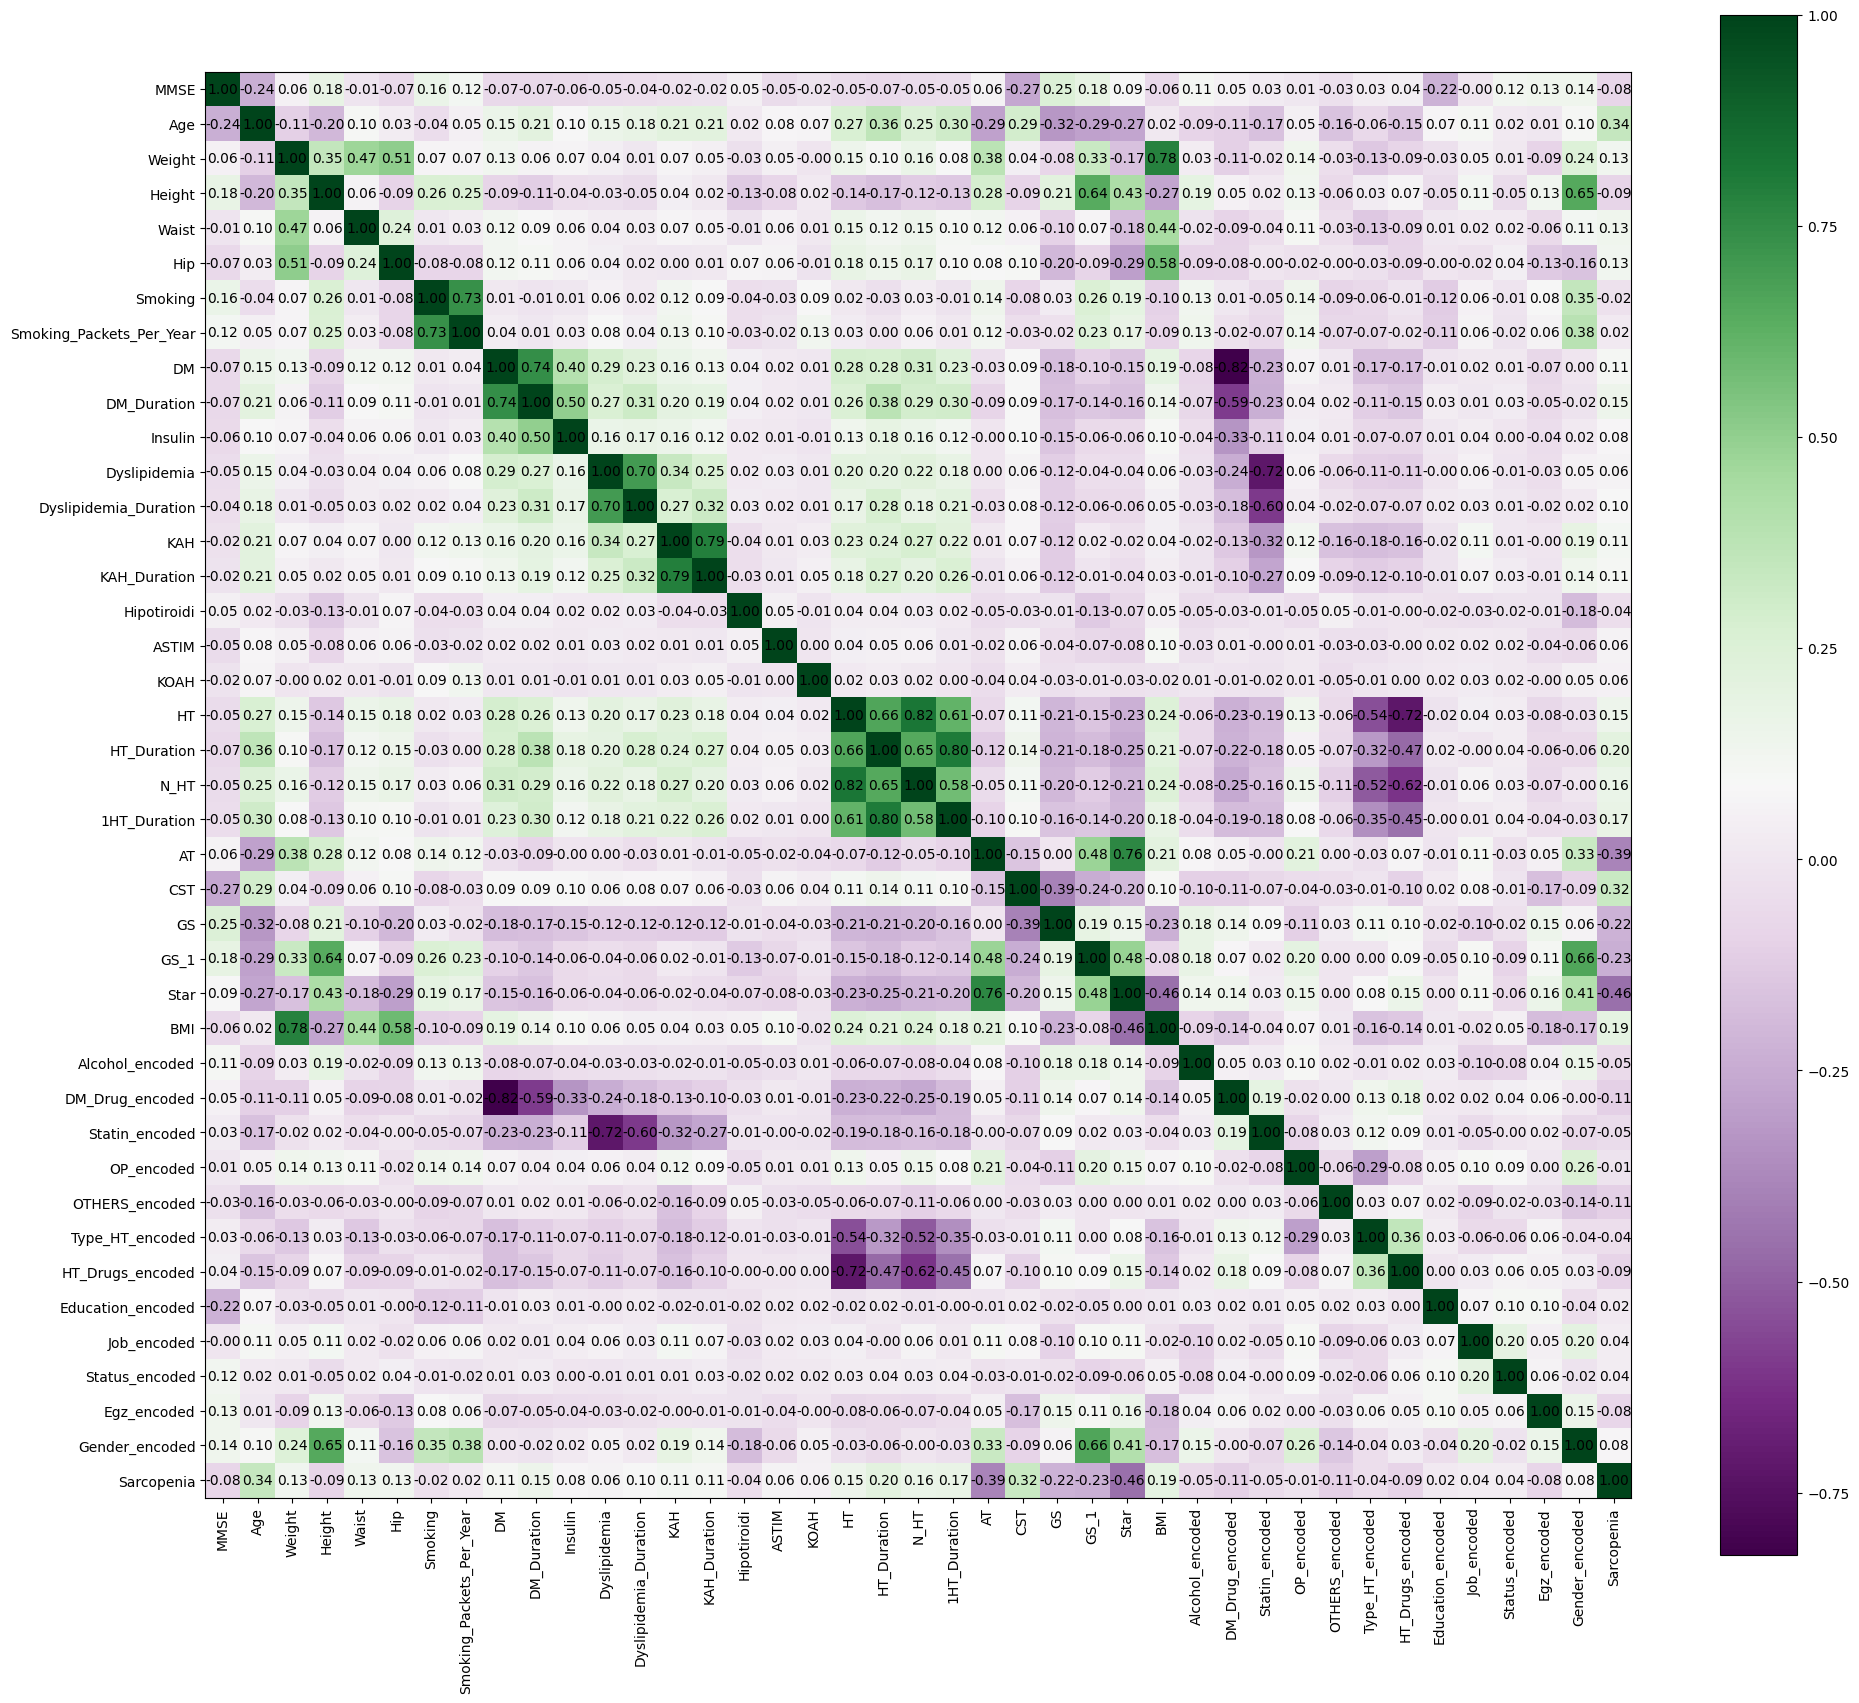

In [20]:
# Data Visualization
# Draw heatmap to see correlation
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.figure(figsize=(23,20))

plt.imshow(corr,cmap = 'PRGn')
cbar = plt.colorbar(spacing='uniform')

plt.xticks(range(len(corr)),labels =corr.columns,rotation = 90)
plt.yticks(range(len(corr)),labels = corr.columns)

# Add text annotations for correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Positive Correlation: Age, CST,
# Weak Positive Correlation: BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

In [21]:
# What is the impact of age to Sarcopenia
import plotly.express as px

# Above 60 years old there is higher chance of becoming Sarcopenia.
# In the dataset for the ages between 40-60, 8% of the population is Sarcopenia
#                for the ages betweeb 60-80, 25% of the population is Sarcopenia
# There is a direct relationship between Age and Sarcopenia

fig = px.histogram(df, x='Age', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Age',
                   labels={'Age': 'Age', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', barmode='overlay')

fig.show()


In [22]:
# What is the impact of MMSE to Sarcopenia
import plotly.express as px

# When MMSE score is lower there is a higher chance of becoming Sarcopenia.
# In the dataset if MMSE score is between 20-24 1/4 of the population is Sarcopenia
#                if MMSE score is between 25-30 1/5 of the population is Sarcopenia
# There is a negative correleration between MMSE and Sarcopenia

fig = px.histogram(df, x='MMSE', color='Sarcopenia',
                   title='Distribution of Sarcopenia by MMSE',
                   labels={'MMSE': 'MMSE', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='MMSE', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [23]:
# What is the impact of BMI to Sarcopenia
import plotly.express as px

# When BMI score is higher there is a higher chance of becoming Sarcopenia.
# In the dataset if BMI is between 30-39.9 1/4 of the population is Sarcopenia
#                if BMI is between 40-49.9 almost 1/2 of the population is Sarcopenia
# There is a positive correleration between BMI and Sarcopenia

fig = px.histogram(df, x='BMI', color='Sarcopenia',
                   title='Distribution of Sarcopenia by BMI',
                   labels={'BMI': 'BMI', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='BMI', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [24]:
# What is the impact of OP to Sarcopenia
import plotly.express as px

# OP = 0 or OP = 1 the impact is somewhat same. Not a good determinator.
fig = px.histogram(df, x='OP', color='Sarcopenia',
                   title='Distribution of Sarcopenia by OP',
                   labels={'OP': 'OP', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='OP', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [25]:
# What is the impact of HT to Sarcopenia
import plotly.express as px

# If the patience has HT there is higher chance of becoming Sarcopenia
fig = px.histogram(df, x='HT', color='Sarcopenia',
                   title='Distribution of Sarcopenia by HT',
                   labels={'HT': 'HT', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='HT', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [26]:
df['Egz'].unique()

array(['3-4/week', '0', '1-2/week', nan, ' 1-2/week'], dtype=object)

In [27]:
df['Egz'] = df['Egz'].replace(' 1-2/week','1-2/week')

In [28]:
# What is the impact of Egz to Sarcopenia
import plotly.express as px

# If you dont do exercise you have higher chance for Sarcopenia
# Used this feature but the results got worse

fig = px.histogram(df, x='Egz', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Egz',
                   labels={'Egz': 'Egz', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Egz', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [29]:
# What is the impact of Star to Sarcopenia
import plotly.express as px

# If star is less than 1 you have higher chance of Sarcopenia

fig = px.histogram(df, x='Star', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Star',
                   labels={'Star': 'Star', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Star', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [30]:
# DATA PREPRATION/PREPROCESSING (MANUAL) #

In [31]:
# Look for not null dataset size for selected parameters (4103 data points)
#cleaned_df = df[(~df['MMSE'].isna())& (~df['BMI'].isna()) & (~df['Age'].isna()) & (~df['HT'].isna())]


# Drop null data points
filter_columns = ['MMSE','BMI','Age', 'CST','HT_Duration','N_HT','1HT_Duration','Star','AT','GS_1','GS','HT','Sarcopenia']

cleaned_df = pd.DataFrame()

for col in filter_columns:
  cleaned_df[col] = df[col].dropna().reset_index(drop=True)

In [32]:
cleaned_df = cleaned_df[['MMSE','BMI','Age', 'CST','HT_Duration','N_HT','1HT_Duration','Star','AT','GS_1','GS','HT','Sarcopenia']]

In [33]:
cleaned_df

,MMSE,BMI,Age,CST,HT_Duration,N_HT,1HT_Duration,Star,AT,GS_1,GS,HT,Sarcopenia
0,29.0,27.80,74.0,12.5,5.0,1.0,5.0,1.81,50.2,32.0,1.2,1.0,0
1,30.0,35.50,62.0,12.1,0.0,0.0,0.0,1.38,49.0,47.0,1.4,0.0,1
2,28.0,31.20,65.0,8.7,0.0,0.0,0.0,1.20,37.3,33.0,1.2,0.0,0
3,29.0,26.60,71.0,8.3,12.0,3.0,12.0,1.11,29.5,25.0,1.2,1.0,0
4,27.0,31.30,61.0,11.0,1.5,2.0,1.5,1.26,39.5,31.0,1.3,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,30.0,23.45,70.0,12.5,25.0,3.0,0.0,1.33,31.8,18.0,1.1,1.0,0
4111,29.0,33.78,76.0,10.7,0.0,0.0,0.0,1.00,36.2,19.0,1.1,0.0,0
4112,30.0,29.04,69.0,6.2,0.0,2.0,0.0,1.10,37.8,30.0,1.2,1.0,0
4113,30.0,25.76,64.0,7.5,0.0,3.0,0.0,1.35,38.0,23.0,1.3,0.0,0


In [34]:
# MODEL SELECTION #

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [36]:
steps_num = [('imputer', SimpleImputer(missing_values = np.nan, strategy = 'mean')),
             ('scaler', StandardScaler())]

steps_cat = [('imputer', SimpleImputer(missing_values = np.nan,strategy ='most_frequent')),
             ('oneHot', OneHotEncoder(handle_unknown='ignore'))]

numeric_transformator = Pipeline(steps = steps_num)

#numeric_features = ['MMSE','BMI','Age']

#numeric_features = ['MMSE','BMI','Age', 'CST','HT_Duration','N_HT','1HT_Duration','Star','AT','GS_1','GS']

numeric_features = ['MMSE','BMI','Age', 'CST','Star','AT','GS_1','GS']

categoric_transformer = Pipeline(steps = steps_cat)

categoric_features =['HT']


# Positive Correlation: Age, CST,
# Weak Positive Correlation: MMSE, BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

In [37]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformator, numeric_features ),
                                                 ('cat', categoric_transformer, categoric_features)])

'''
def arrange_Egz(df):
    df['Egz'] = df['Egz'].replace('1-2/week','1')
    df['Egz'] = df['Egz'].replace('3-4/week','1')
    return df

preprocessor = ColumnTransformer(transformers = [('arrange_Egz', FunctionTransformer(arrange_Egz, validate=False), df),
                                                 ('num', numeric_transformator, numeric_features ),
                                                 ('cat', categoric_transformer, categoric_features)])
'''

"\ndef arrange_Egz(df):\n    df['Egz'] = df['Egz'].replace('1-2/week','1')\n    df['Egz'] = df['Egz'].replace('3-4/week','1')\n    return df\n\npreprocessor = ColumnTransformer(transformers = [('arrange_Egz', FunctionTransformer(arrange_Egz, validate=False), df),\n                                                 ('num', numeric_transformator, numeric_features ),\n                                                 ('cat', categoric_transformer, categoric_features)])\n"

In [38]:
# Test Linear Regression Model
reg = Pipeline(steps = [('preprocessor', preprocessor),
                        ('regression', LinearRegression())]
               )

In [39]:
y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)

In [40]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [41]:
clf = reg.fit(X_train,y_train)

In [42]:
y_pred = reg.predict(X_test)

In [43]:
#print(y_pred)

In [44]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# For MMSE, Age, BMI: 0.37673168288421416
# For MMSE, Age, BMI, HT, Egz: 0.372079414879153
# For MMSE, Age, BMI, HT: 0.3607439385347924
# 'MMSE','BMI','Age', 'CST','HT_Duration','N_HT','1HT_Duration','Star','AT','GS_1','GS',HT: 0.3714790206193374
# 'MMSE','BMI','Age', 'CST','HT_Duration','Star','AT','GS_1','GS',HT: 0.37125710531746015

0.37125710531746015


In [45]:
cv_results = cross_val_score(reg,X_train, y_train, scoring='r2', cv=10)
cv_results

array([0.1905498 , 0.16241802, 0.05747152, 0.13462696, 0.20875258,
       0.03929701, 0.13294466, 0.17524133, 0.15799061, 0.17326637])

In [46]:
cv_results.mean()

# For MMSE, Age, BMI: 0.13569061365708243
# For MMSE, Age, BMI, HT: 0.1281743726723526
# 'MMSE','BMI','Age', 'CST','HT_Duration','N_HT','1HT_Duration','Star','AT','GS_1','GS': 0.14179879290225875
# 'MMSE','BMI','Age', 'CST','HT_Duration','Star','AT','GS_1','GS',HT: 0.14325588551934892

0.14325588551934892

In [58]:
# Test the data with XGBOOST Model



In [48]:
import xgboost as xgb

In [49]:
xgb_model = Pipeline(steps=[('preprocessor',preprocessor),('xgb',xgb.XGBRegressor())])

In [50]:
scores = cross_val_score(xgb_model, X,y, scoring ='r2', cv =10)
scores

array([ 0.19590142,  0.1271396 ,  0.1559944 ,  0.17825127,  0.0961884 ,
        0.21279328,  0.11335756, -0.1510351 , -0.27194533, -0.13448491])

In [51]:
scores.mean()

0.052216058906601484

In [52]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'BMI', 'Age', 'CST',
                                                   'Star', 'AT', 'GS_1',
                                                   'GS']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HT'])])),
                ('xgb',
                 XGBRegre...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [53]:
test_score = xgb_model.score(X_test,y_test)
print("Test Set Score:", test_score)

Test Set Score: 0.07667484954744219


In [57]:
result = xgb_model.predict(X_test)
result

array([ 1.63076743e-02, -2.34477292e-03,  3.53375077e-01, -1.64687876e-02,
        6.30033165e-02,  1.23536043e-01,  1.96598452e-02,  5.64922616e-02,
        6.55399501e-01,  7.37746432e-02,  1.26298115e-01,  9.97134075e-02,
        3.14469516e-01, -6.96051568e-02,  4.53493774e-01,  2.89976411e-02,
       -2.06937250e-02,  5.49203277e-01,  5.66043779e-02, -1.22897364e-01,
        2.30903462e-01,  2.26308331e-01,  2.68523157e-01,  6.05228916e-02,
        5.16798973e-01,  5.67118764e-01,  9.24252629e-01, -3.28238346e-02,
       -6.74269199e-02,  3.59623790e-01, -5.11124730e-02,  1.59228340e-01,
       -8.21648389e-02,  1.96095467e-01, -2.47302875e-02,  4.73343551e-01,
        4.95622337e-01,  2.45631576e-01, -6.71915486e-02,  7.78757967e-04,
        7.99409766e-03,  1.22181438e-01, -6.78968057e-02,  9.20101583e-01,
       -4.79333028e-02,  3.27110142e-01,  7.02013314e-01, -4.33599278e-02,
       -1.01194596e-02, -3.66459154e-02,  3.05232525e-01,  4.05060709e-01,
        1.01261742e-01,  